In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = yf.download("NVDA")
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
1999-01-22,0.037615,0.044779,0.035585,0.040122,2714688000
1999-01-25,0.041556,0.042033,0.037615,0.040600,510480000
1999-01-26,0.038331,0.042869,0.037734,0.042033,343200000
1999-01-27,0.038212,0.039406,0.036301,0.038451,244368000
1999-01-28,0.038092,0.038451,0.037854,0.038212,227520000
...,...,...,...,...,...
2025-01-27,118.419998,128.399994,116.699997,124.800003,818830900
2025-01-28,128.990005,129.000000,116.250000,121.809998,579666400


In [6]:
# moving averages
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

data = data.dropna()

X = data[['Close', 'MA_10', 'MA_50']]
y = data['Close'].shift(-1).dropna()
X = X[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False, stratify = None)

In [7]:
# fitting, testing
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 3.599675561660932
R² Score: 0.9977182991907648


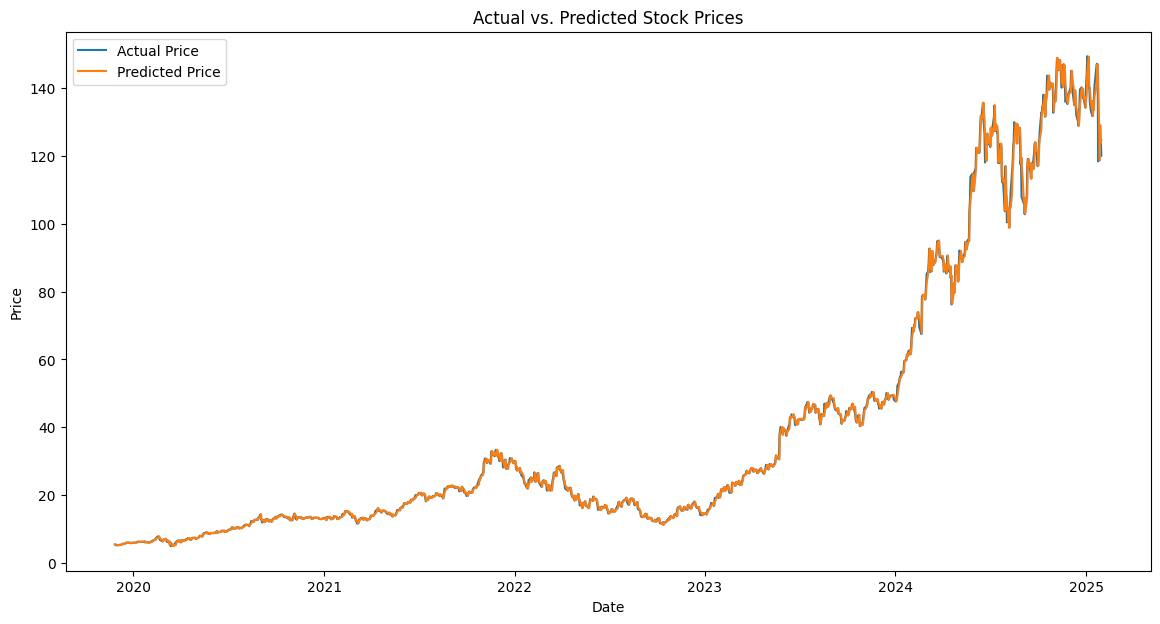

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

In [9]:
# super aggressive investment strat
start_bal = 100
curr_bal = start_bal
position = 0  

for i in range(len(X_test)):
    current_price = X_test.iloc[i]['Close'].values[0]
    predicted_price = predictions[i][0]
    
    if predicted_price > current_price and curr_bal >= current_price:
        shares_to_buy = curr_bal / current_price
        if shares_to_buy > 0:  
            position += shares_to_buy
            curr_bal -= shares_to_buy * current_price
            print(f"Buying {shares_to_buy} shares at {current_price:.2f}")

    elif predicted_price < current_price and position > 0:
        curr_bal += position * current_price
        print(f"Selling {position} shares at {current_price:.2f}")
        position = 0

print("")

final_bal = curr_bal + (position * X_test.iloc[-1]['Close'].values[0])
profit = final_bal - start_bal
print(f"Final balance: ${final_bal:.2f}")
print(f"Profit: ${profit:.2f}")

Buying 18.405280888374403 shares at 5.43
Selling 18.405280888374403 shares at 6.55
Buying 17.87442786106048 shares at 6.74
Selling 17.87442786106048 shares at 7.21
Buying 16.779494728586563 shares at 7.69
Selling 16.779494728586563 shares at 5.13
Buying 14.1543240829712 shares at 6.08
Selling 14.1543240829712 shares at 6.69
Buying 14.666332656555543 shares at 6.45
Selling 14.666332656555543 shares at 6.65
Buying 14.88943976675483 shares at 6.55
Selling 14.88943976675483 shares at 6.72
Buying 13.99726903816388 shares at 7.15
Selling 13.99726903816388 shares at 13.19
Buying 14.172475084382663 shares at 13.03
Selling 14.172475084382663 shares at 13.76
Buying 15.309210187965787 shares at 12.73
Selling 15.309210187965787 shares at 13.36
Buying 15.363728008810858 shares at 13.32
Selling 15.363728008810858 shares at 13.33
Buying 15.500632149000394 shares at 13.21
Selling 15.500632149000394 shares at 13.31
Buying 15.89621305457878 shares at 12.98
Selling 15.89621305457878 shares at 13.08
Buyin

In [70]:
# slightly less aggressive investment strat
start_bal = 100
curr_bal = start_bal
position = 0  
current_price = [1, 1]

for i in range(1, len(X_test)):
    current_price[0] = X_test.iloc[i-1]['Close'].values[0]
    current_price[1] = X_test.iloc[i]['Close'].values[0]
    predicted_price = predictions[i][0]
    
    if predicted_price > current_price[0] and predicted_price > current_price[1] and curr_bal >= current_price[1]:
        shares_to_buy = curr_bal / current_price[1]
        if shares_to_buy > 0:  
            position += shares_to_buy
            curr_bal -= shares_to_buy * current_price[1]
            print(f"Buying {shares_to_buy} shares at {current_price[1]:.2f}")

    elif predicted_price < current_price[1] and position > 0:
        curr_bal += position * current_price[1]
        print(f"Selling {position} shares at {current_price[1]:.2f}")
        position = 0

print("")

final_bal = curr_bal + (position * X_test.iloc[-1]['Close'].values[0])
profit = final_bal - start_bal
print(f"Final balance: ${final_bal:.2f}")
print(f"Profit: ${profit:.2f}")

Buying 233.3573475357207 shares at 0.43
Selling 233.3573475357207 shares at 15.73
Buying 2833.5028368168287 shares at 1.30
Selling 2833.5028368168287 shares at 129.59
Buying 7334.658489898399 shares at 50.06
Selling 7334.658489898399 shares at 2.27
Buying 1067.54355297283 shares at 15.61
Selling 1067.54355297283 shares at 22.16
Buying 3593.4103004535928 shares at 6.58
Selling 3593.4103004535928 shares at 8.94
Buying 6243.232437680125 shares at 5.14
Selling 6243.232437680125 shares at 29.75
Buying 14230.806459207291 shares at 13.05
Selling 14230.806459207291 shares at 39.75
Buying 115616.21436223762 shares at 4.89
Selling 115616.21436223762 shares at 21.69
Buying 542315.797708817 shares at 4.62
Selling 542315.797708817 shares at 85.94
Buying 340431.0390275353 shares at 136.91
Selling 340431.0390275353 shares at 39.15
Buying 2243477.7902995916 shares at 5.94
Selling 2243477.7902995916 shares at 30.60
Buying 234680045.84075806 shares at 0.29
Selling 234680045.84075806 shares at 69.31
Buyi

In [71]:
# mild investment strat
start_bal = 100
curr_bal = start_bal
position = 0  
current_price = [1, 1]

for i in range(1, len(X_test)):
    current_price[0] = X_test.iloc[i-1]['Close'].values[0]
    current_price[1] = X_test.iloc[i]['Close'].values[0]
    predicted_price = predictions[i][0]
    
    if predicted_price > current_price[0] and predicted_price > current_price[1] and curr_bal >= current_price[1]:
        shares_to_buy = curr_bal / current_price[1]
        if shares_to_buy > 0:  
            position += shares_to_buy
            curr_bal -= shares_to_buy * current_price[1]
            print(f"Buying {shares_to_buy} shares at {current_price[1]:.2f}")

    elif predicted_price < current_price[0] and predicted_price < current_price[1] and position > 0:
        curr_bal += position * current_price[1]
        print(f"Selling {position} shares at {current_price[1]:.2f}")
        position = 0

print("")

final_bal = curr_bal + (position * X_test.iloc[-1]['Close'].values[0])
profit = final_bal - start_bal
print(f"Final balance: ${final_bal:.2f}")
print(f"Profit: ${profit:.2f}")

Buying 233.3573475357207 shares at 0.43
Selling 233.3573475357207 shares at 13.78
Buying 4336.697550582155 shares at 0.74

Final balance: $53904.95
Profit: $53804.95


[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 2.2920678967144665
R² Score: 0.9997579292153048


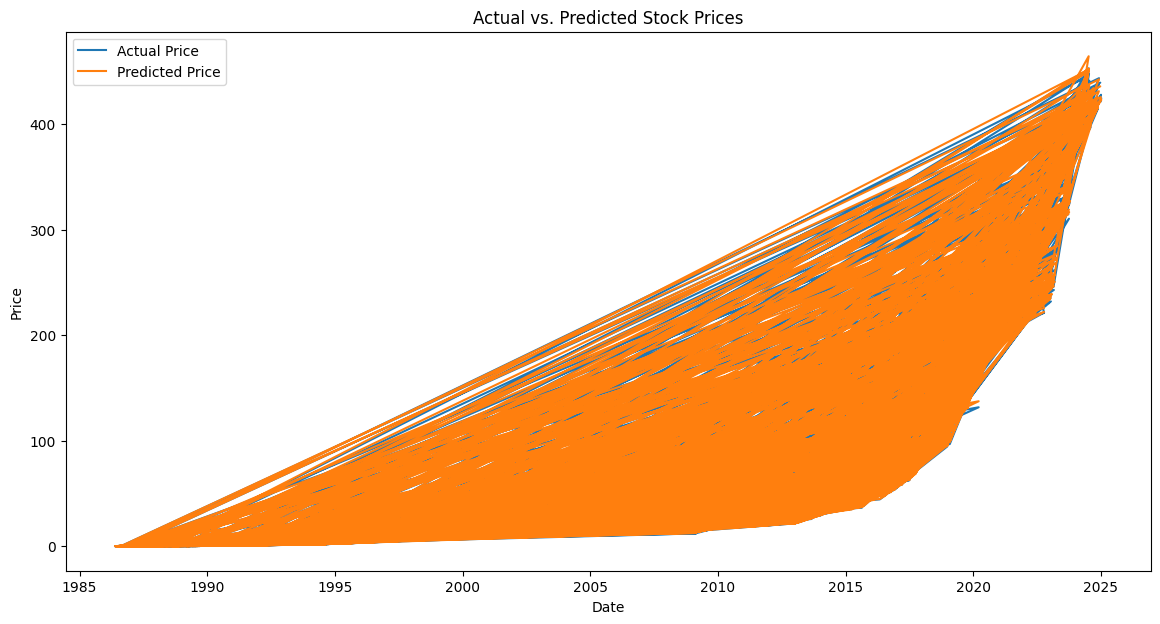

In [53]:
data = yf.download("MSFT")
data

# moving averages
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

data = data.dropna()

X = data[['Close', 'MA_10', 'MA_50']]
y = data['Close'].shift(-1).dropna()
X = X[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fitting, testing
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price')
plt.plot(y_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()